# Step 1: Import Required Libraries



In [3]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Step 2: Load Dataset

In [5]:
df = pd.read_csv(r"data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


# Step 3: Exploratory Data Analysis (EDA)

In [6]:
df.shape

(8518, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


# Checking Duplicate Records

In [8]:
df.duplicated().sum()

np.int64(4)

In [9]:
df.drop_duplicates(inplace=True)

# Handling Missing Values

In [10]:
df.isnull().sum()

,0
Reviewer Name,6
Review Title,6
Place of Review,46
Up Votes,6
Down Votes,6
Month,461
Review text,4
Ratings,0


In [11]:
(df.isnull().sum() / df.shape[0] ) * 100

,0
Reviewer Name,0.070472
Review Title,0.070472
Place of Review,0.540287
Up Votes,0.070472
Down Votes,0.070472
Month,5.414611
Review text,0.046981
Ratings,0.000000


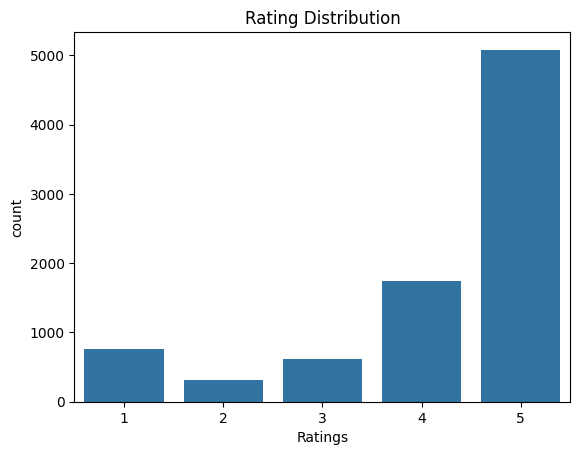

In [12]:
# Rating distribution
sns.countplot(x='Ratings', data=df)
plt.title("Rating Distribution")
plt.show()


# Step 4: Sentiment Label Creation

In [13]:
df = df[df['Ratings'] != 3]

df['sentiment'] = df['Ratings'].apply(lambda x: 1 if x >= 4 else 0)

df[['Ratings', 'sentiment']].head()


,Ratings,sentiment
0,4,1
1,1,0
2,1,0
4,1,0
5,5,1


# Combine Review Title + Review Text

In [14]:
df['review'] = df['Review Title'].fillna('') + " " + df['Review text'].fillna('')
df = df[['review', 'sentiment']]
df.head()

,review,sentiment
0,"Nice product Nice product, good quality, but p...",1
1,Don't waste your money They didn't supplied Yo...,0
2,Did not meet expectations Worst product. Damag...,0
4,Over priced Over pricedJust â?¹620 ..from reta...,0
5,Mind-blowing purchase Good quality product. De...,1


# Step 5: Text Cleaning & Normalization

In [15]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['review'].astype(str).apply(clean_text)

df[['review', 'clean_review']].head()


,review,clean_review
0,"Nice product Nice product, good quality, but p...",nice product nice product good quality price r...
1,Don't waste your money They didn't supplied Yo...,waste money supplied yonex mavis outside cover...
2,Did not meet expectations Worst product. Damag...,meet expectation worst product damaged shuttle...
4,Over priced Over pricedJust â?¹620 ..from reta...,priced pricedjust retailer understand wat adva...
5,Mind-blowing purchase Good quality product. De...,mind blowing purchase good quality product del...


In [16]:
df["review"].iloc[0]

'Nice product Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [17]:
df["clean_review"].iloc[0]

'nice product nice product good quality price rising bad sign affordable price especially play everyday kindly help u term price thank read'

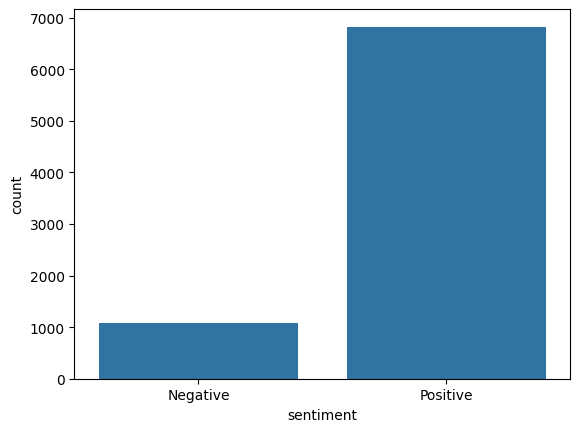

In [18]:
sns.countplot(x='sentiment', data=df)
plt.xticks([0,1], ['Negative','Positive'])
plt.show()

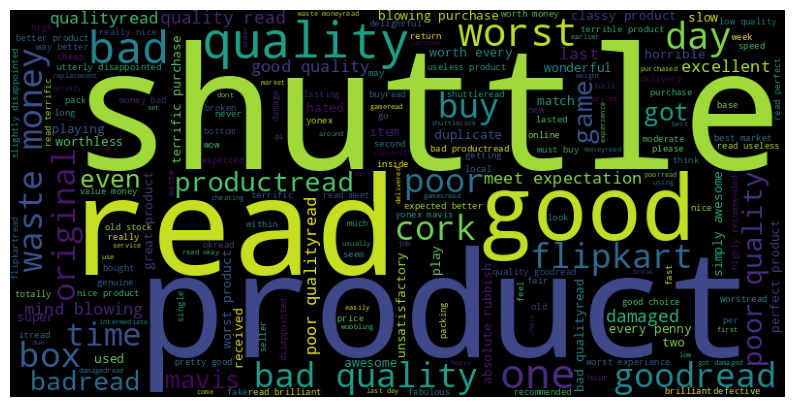

In [19]:
# Negative Reviews
from wordcloud import WordCloud

negative_text = " ".join(df[df['sentiment']==0]['clean_review'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

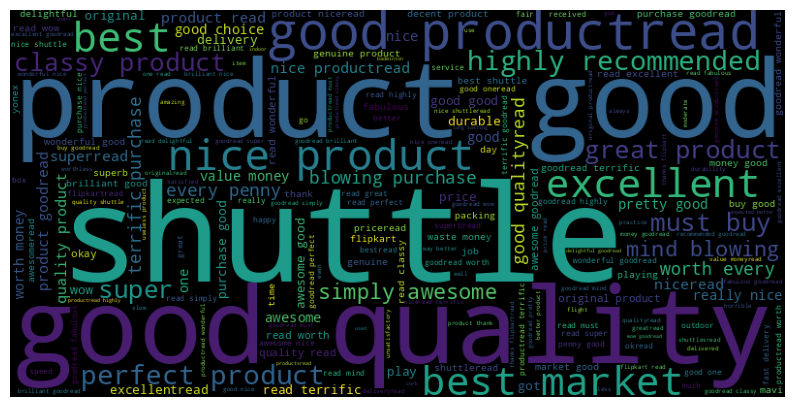

In [20]:
# Positive Reviews
positive_text = " ".join(df[df['sentiment']==1]['clean_review'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Step 6: Train-Test Split

In [21]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 7: Model Training and Hyper parameter tunning using Optuna

In [22]:
!pip install optuna tensorflow
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 32.9 MB/s eta 0:00:00


In [23]:
import optuna

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# from sklearn.model_selection import StratifiedKFold, cross_val_score

In [24]:
def objective(trial):

    # Vectorizer as hyperparameter
    vectorizer_name = trial.suggest_categorical(
        "vectorizer",
        ["bow", "tfidf"]
    )

    max_features = trial.suggest_int("max_features", 3000, 10000)

    if vectorizer_name == "bow":
        vectorizer = CountVectorizer(max_features=max_features)
    else:
        vectorizer = TfidfVectorizer(max_features=max_features)

    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Model as hyperparameter
    model_name = trial.suggest_categorical(
        "model",
        ["logistic_regression", "svm", "naive_bayes", "random_forest", "xgboost"]
    )

    # ---------------- Logistic Regression ----------------
    if model_name == "logistic_regression":
        C = trial.suggest_float("lr_C", 0.01, 10.0, log=True)

        model = LogisticRegression(
            C=C,
            max_iter=1000
        )

    # ---------------- Linear SVM ----------------
    elif model_name == "svm":
        C = trial.suggest_float("svm_C", 0.01, 10.0, log=True)
        model = LinearSVC(C=C)

    # ---------------- Naive Bayes ----------------
    elif model_name == "naive_bayes":
        alpha = trial.suggest_float("nb_alpha", 0.01, 2.0)
        model = MultinomialNB(alpha=alpha)

    # ---------------- Random Forest ----------------
    elif model_name == "random_forest":
        n_estimators = trial.suggest_int("rf_n_estimators", 100, 500)
        max_depth = trial.suggest_int("rf_max_depth", 5, 40)

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            n_jobs=-1,
            random_state=42
        )

    # ---------------- XGBoost ----------------
    else:
        n_estimators = trial.suggest_int("xgb_n_estimators", 100, 400)
        max_depth = trial.suggest_int("xgb_max_depth", 3, 10)
        learning_rate = trial.suggest_float("xgb_learning_rate", 0.01, 0.3)

        model = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="binary:logistic",
            eval_metric="logloss",
            n_jobs=-1,
            random_state=42
        )

    # Train & Evaluate
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    return f1_score(y_test, preds)




In [25]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


[I 2026-02-02 17:59:10,543] A new study created in memory with name: no-name-b6153a23-ef1a-449d-b8e2-dea9c3f50ed6
[I 2026-02-02 17:59:11,652] Trial 0 finished with value: 0.9552452559971357 and parameters: {'vectorizer': 'bow', 'max_features': 5878, 'model': 'xgboost', 'xgb_n_estimators': 141, 'xgb_max_depth': 8, 'xgb_learning_rate': 0.15735056106557913}. Best is trial 0 with value: 0.9552452559971357.
[I 2026-02-02 17:59:13,467] Trial 1 finished with value: 0.9548845470692717 and parameters: {'vectorizer': 'tfidf', 'max_features': 9690, 'model': 'xgboost', 'xgb_n_estimators': 277, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.08494241752420713}. Best is trial 0 with value: 0.9552452559971357.
[I 2026-02-02 17:59:14,675] Trial 2 finished with value: 0.955834829443447 and parameters: {'vectorizer': 'bow', 'max_features': 9203, 'model': 'xgboost', 'xgb_n_estimators': 197, 'xgb_max_depth': 7, 'xgb_learning_rate': 0.16492261387428908}. Best is trial 2 with value: 0.955834829443447.
[I 2026-02

In [26]:
print("Best F1 Score:", study.best_value)
print("Best Configuration:")
study.best_params


Best F1 Score: 0.9587961304192046
Best Configuration:


{'vectorizer': 'tfidf',
 'max_features': 8359,
 'model': 'svm',
 'svm_C': 0.35277849452502125}

# Optuna Visualizations

In [35]:
# For visualizations
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [36]:
# 1. Optimization History
plot_optimization_history(study).show()

In [42]:
# 2. Parallel Coordinates Plot
# plot_parallel_coordinate(study).show()

In [38]:
# 3. Slice Plot
plot_slice(study).show()

In [51]:
# 4. Contour Plot
# plot_contour(study).show()

In [41]:
# 5. Hyperparameter Importance
plot_param_importances(study).show()

# SVM Sentiment Model (Using Best Optuna Parameters)

In [27]:
vectorizer = CountVectorizer(max_features=8359)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [28]:
final_model = LinearSVC(C=0.35277849452502125)

final_model.fit(X_train_vec, y_train)


LinearSVC(C=0.35277849452502125)

In [29]:
y_pred = final_model.predict(X_test_vec)

print("Final F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Final F1 Score: 0.9559884559884559
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       215
           1       0.94      0.97      0.96      1365

    accuracy                           0.92      1580
   macro avg       0.86      0.79      0.82      1580
weighted avg       0.92      0.92      0.92      1580



# Step 7: Save Model & Vectorizer

In [52]:
import pickle
pickle.dump(final_model, open("sentiment_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


# DEEP LEARNING MODEL (LSTM + OPTUNA)

### Tokenization for Deep Learning

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_LEN = 150

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN)


### LSTM Hyperparameter Tuning

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [32]:
def objective_lstm(trial):

    embedding_dim = trial.suggest_int("embedding_dim", 64, 256)
    lstm_units = trial.suggest_int("lstm_units", 32, 128)
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)

    model = Sequential([
        Embedding(MAX_WORDS, embedding_dim, input_length=MAX_LEN),
        LSTM(lstm_units),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        metrics=[]
    )

    model.fit(
        X_train_pad, y_train,
        epochs=3,
        batch_size=128,
        verbose=0
    )

    preds = (model.predict(X_test_pad) > 0.5).astype(int)
    return f1_score(y_test, preds)


In [33]:
study_lstm = optuna.create_study(direction="maximize")
study_lstm.optimize(objective_lstm, n_trials=10)




[I 2026-02-02 18:01:10,224] A new study created in memory with name: no-name-e9a5834b-270b-4f0d-b50e-1ea4ba9faa4e


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2026-02-02 18:01:20,571] Trial 0 finished with value: 0.9577259475218659 and parameters: {'embedding_dim': 169, 'lstm_units': 100, 'dropout': 0.25088801870151944, 'lr': 0.0019329496909858204}. Best is trial 0 with value: 0.9577259475218659.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2026-02-02 18:01:25,241] Trial 1 finished with value: 0.9555873925501432 and parameters: {'embedding_dim': 253, 'lstm_units': 126, 'dropout': 0.2854127948875402, 'lr': 0.0005502965362625516}. Best is trial 0 with value: 0.9577259475218659.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2026-02-02 18:01:28,524] Trial 2 finished with value: 0.9581056466302368 and parameters: {'embedding_dim': 112, 'lstm_units': 46, 'dropout': 0.4219191539665011, 'lr': 0.008363577963596793}. Best is trial 2 with value: 0.9581056466302368.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2026-02-02 18:01:32,935] Trial 3 finished with value: 0.9269949066213922 and parameters: {'embedding_dim': 85, 'lstm_units': 77, 'dropout': 0.34849614259041173, 'lr': 0.0001860632748935404}. Best is trial 2 with value: 0.9581056466302368.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2026-02-02 18:01:37,765] Trial 4 finished with value: 0.9597971749366172 and parameters: {'embedding_dim': 190, 'lstm_units': 126, 'dropout': 0.45000440595148533, 'lr': 0.002500215539614918}. Best is trial 4 with value: 0.9597971749366172.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2026-02-02 18:01:41,511] Trial 5 finished with value: 0.9614414414414414 and parameters: {'embedding_dim': 206, 'lstm_units': 58, 'dropout': 0.3814484351374112, 'lr': 0.0017983684888207374}. Best is trial 5 with value: 0.9614414414414414.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2026-02-02 18:01:46,288] Trial 6 finished with value: 0.9581056466302368 and parameters: {'embedding_dim': 159, 'lstm_units': 60, 'dropout': 0.4873762585266581, 'lr': 0.006793087368027332}. Best is trial 5 with value: 0.9614414414414414.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2026-02-02 18:01:50,367] Trial 7 finished with value: 0.9611231101511879 and parameters: {'embedding_dim': 231, 'lstm_units': 85, 'dropout': 0.49865133020837515, 'lr': 0.005105487555580721}. Best is trial 5 with value: 0.9614414414414414.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2026-02-02 18:01:53,856] Trial 8 finished with value: 0.9272603670972128 and parameters: {'embedding_dim': 164, 'lstm_units': 58, 'dropout': 0.3946628116402404, 'lr': 0.0001932674591591174}. Best is trial 5 with value: 0.9614414414414414.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2026-02-02 18:02:00,152] Trial 9 finished with value: 0.9476642079381805 and parameters: {'embedding_dim': 251, 'lstm_units': 33, 'dropout': 0.3135832890993917, 'lr': 0.0005047246012300629}. Best is trial 5 with value: 0.9614414414414414.


{'embedding_dim': 206,
 'lstm_units': 58,
 'dropout': 0.3814484351374112,
 'lr': 0.0017983684888207374}

In [50]:
print(study_lstm.best_value)
print(study_lstm.best_params)

0.9614414414414414
{'embedding_dim': 206, 'lstm_units': 58, 'dropout': 0.3814484351374112, 'lr': 0.0017983684888207374}


# LSTM Sentiment Model (Using Best Optuna Parameters)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
MAX_WORDS = 10000
MAX_LEN = 150

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')


In [44]:
model = Sequential([
    Embedding(
        input_dim=MAX_WORDS,
        output_dim=206,
        input_length=MAX_LEN
    ),

    LSTM(58),

    Dropout(0.3814484351374112),

    Dense(1, activation='sigmoid')
])


In [45]:
# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017983684888207374),
    metrics=['accuracy']
)


In [48]:
# train the model
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8131 - loss: 0.4472 - val_accuracy: 0.8782 - val_loss: 0.3765
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8588 - loss: 0.4127 - val_accuracy: 0.8782 - val_loss: 0.3709
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8571 - loss: 0.4147 - val_accuracy: 0.8782 - val_loss: 0.3715
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8580 - loss: 0.4131 - val_accuracy: 0.8782 - val_loss: 0.3708
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8593 - loss: 0.4119 - val_accuracy: 0.8782 - val_loss: 0.3766
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8555 - loss: 0.4148 - val_accuracy: 0.8782 - val_loss: 0.3707
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8634 - loss: 0.4018 - val_accuracy: 0.8782 - val_loss: 0.3712
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8651 - loss: 0.3991 - val_accuracy: 0.8782 - v

In [49]:
# Evaluate the model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
F1 Score: 0.9269949066213922
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       215
           1       0.86      1.00      0.93      1365

    accuracy                           0.86      1580
   macro avg       0.43      0.50      0.46      1580
weighted avg       0.75      0.86      0.80      1580

